# Word2vec implementation using CBOW method

## Importing the packages

In [1]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re

## Loading the training dataset

In [2]:
with open('w2v_train.txt', 'r') as file:
    paragraph = file.read().replace('\n', '')

## Text Preprossing

In [3]:
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

## Tokenizing the sentences of the dataset

In [4]:
sentences = nltk.sent_tokenize(text)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

### Removing the stopwords

In [5]:
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

## Training the model with the dataset

In [18]:
model = Word2Vec(sentences, window=5, min_count=1, workers=4, size=50)
words = model.wv.vocab

In [52]:
model.save('model_cbow')

## Checking if the word is present in the dataset or not

In [20]:
def checkingThePresenceOfWord(word):
    for i in words:
        if i==word:
            print("Present")
            return True
    print("Not present")
    return False

### An example : king, man and woman

In [21]:
kingB = checkingThePresenceOfWord('king')
manB = checkingThePresenceOfWord('man', )
womanB = checkingThePresenceOfWord('woman')

Present
Present
Present


In [29]:
if kingB and manB and womanB:
    kingV = model.wv["king"]
    manV = model.wv["man"]
    womanV = model.wv["woman"]

    resultant = kingV-manV + womanV
    similar = model.wv.most_similar([resultant],topn =5)

In [30]:
similar

[('nothing', 0.5571750402450562),
 ('king', 0.5561482906341553),
 ('woman', 0.5153337121009827),
 ('craves', 0.5003867745399475),
 ('undervaluing', 0.4912577271461487)]

### An example : France, Paris and India

In [24]:
franceB =checkingThePresenceOfWord('france')
parisB = checkingThePresenceOfWord('paris')
indiaB =checkingThePresenceOfWord('india')

Present
Present
Present


In [27]:
if franceB and parisB and indiaB:
    franceV = model.wv['france']
    parisV = model.wv['paris']
    indiaV = model.wv['india']

    resultant = parisV -franceV + indiaV
    similar = model.wv.most_similar([resultant],topn =5)

In [28]:
similar

[('paris', 0.6249914169311523),
 ('india', 0.5757161974906921),
 ('transplanting', 0.5544956922531128),
 ('airliner', 0.5475531220436096),
 ('blase', 0.5311828255653381)]

### Checking for the similarity of king and queen

In [32]:
model.wv.similarity(w1="queen",w2="king")

-0.19174193

# Ploting the graph

### Ploting tSNE


In [53]:
from sklearn.manifold import TSNE
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    #labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

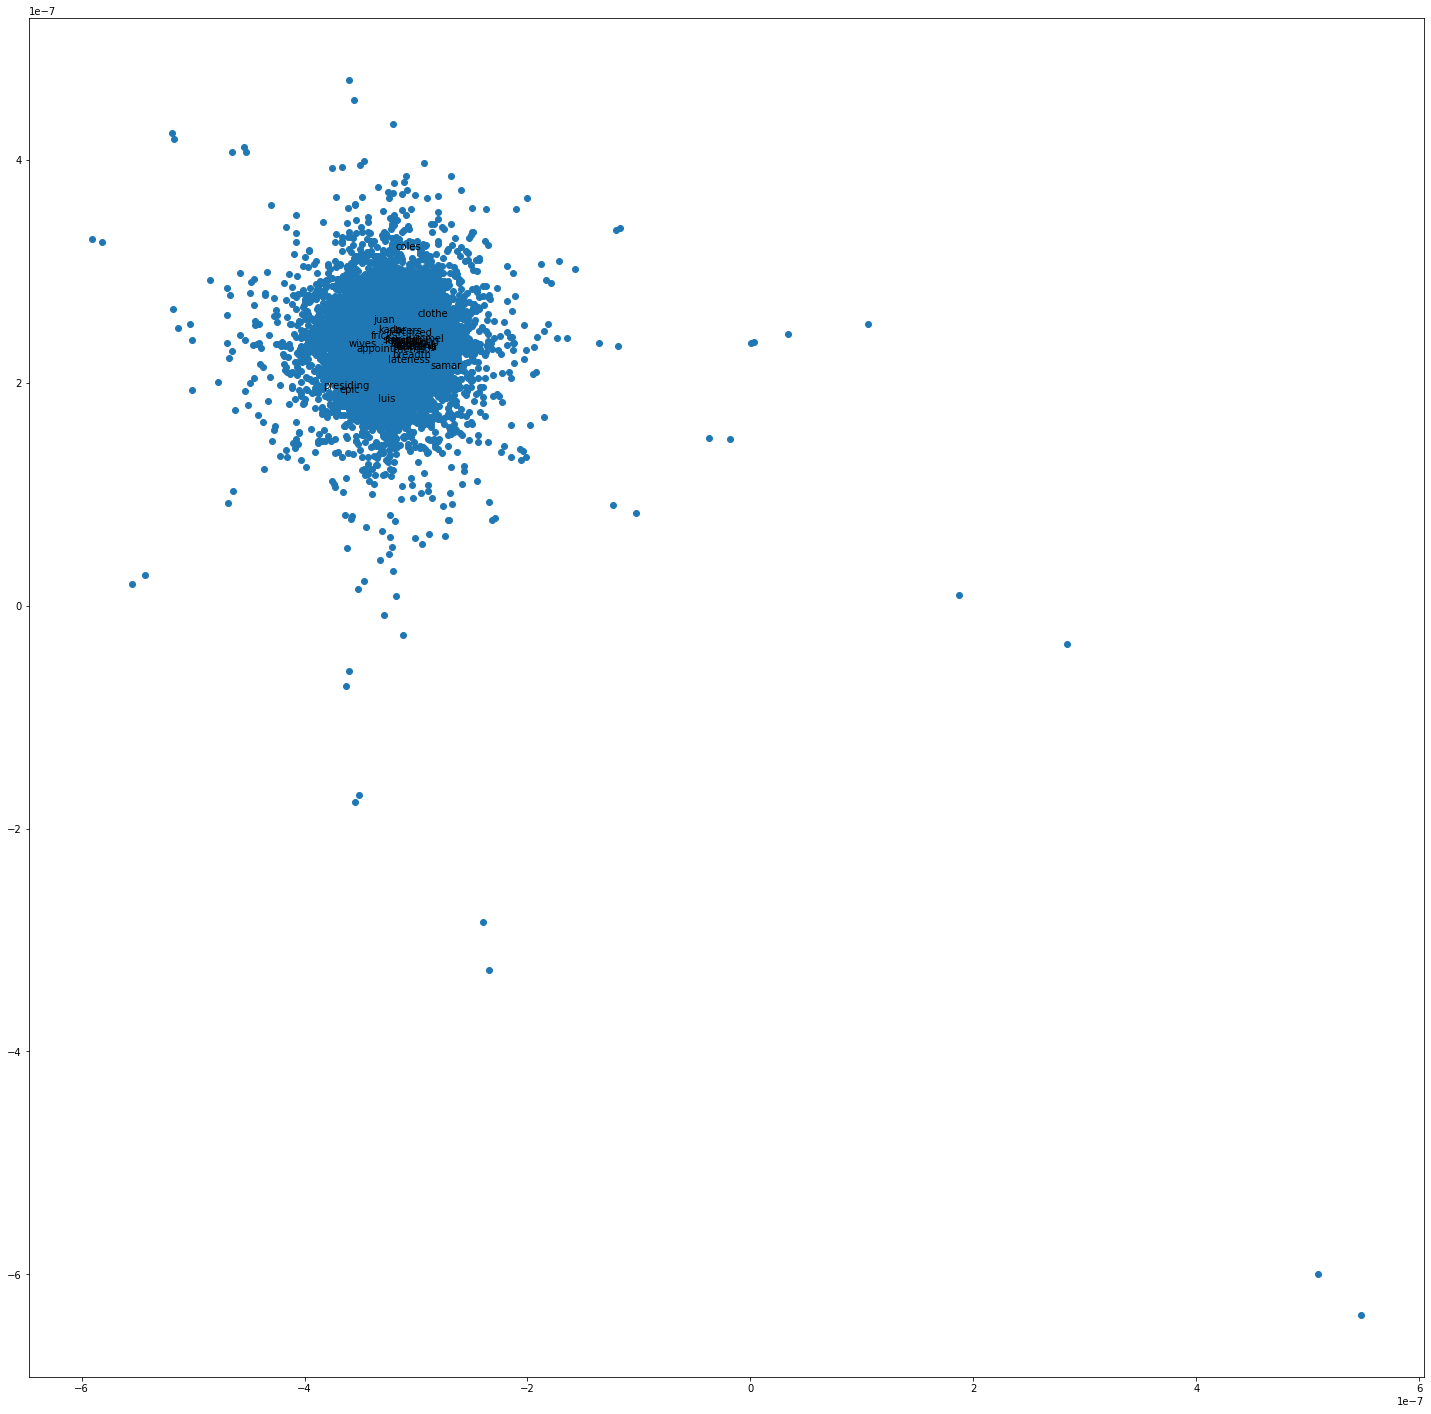

In [35]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(25, 25))
    plt.scatter(x_vals, y_vals)
    
    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_function = plot_with_matplotlib


plot_function(x_vals, y_vals, labels)


In [45]:
keys = ['paris', 'python', 'sunday', 'tolstoy', 'twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

<ipython-input-45-ac8ceed3a65b>:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for similar_word, _ in model.most_similar(word, topn=30):
<ipython-input-45-ac8ceed3a65b>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embeddings.append(model[similar_word])


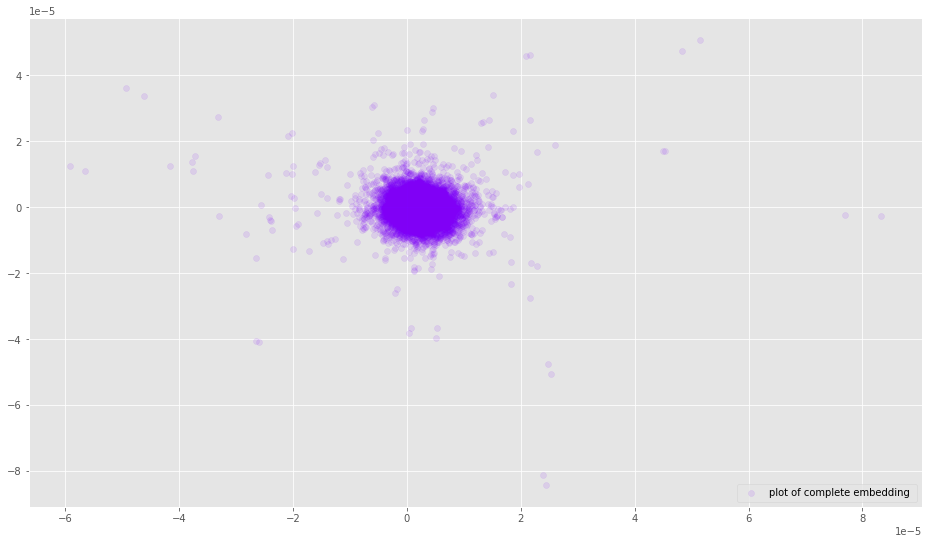

In [55]:
words = []
embeddings = []
for word in list(model.wv.vocab):
    embeddings.append(model.wv[word])
    words.append(word)
    
tsne_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = tsne_2d.fit_transform(embeddings)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("complete_plot_glove.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('plot of complete embedding ', embeddings_2d, a=0.1)

### Ploting PCA 

In [48]:
from sklearn.decomposition import PCA
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
pca_model_en_2d = PCA(n_components=2)
embeddings_en_2d = np.array(pca_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

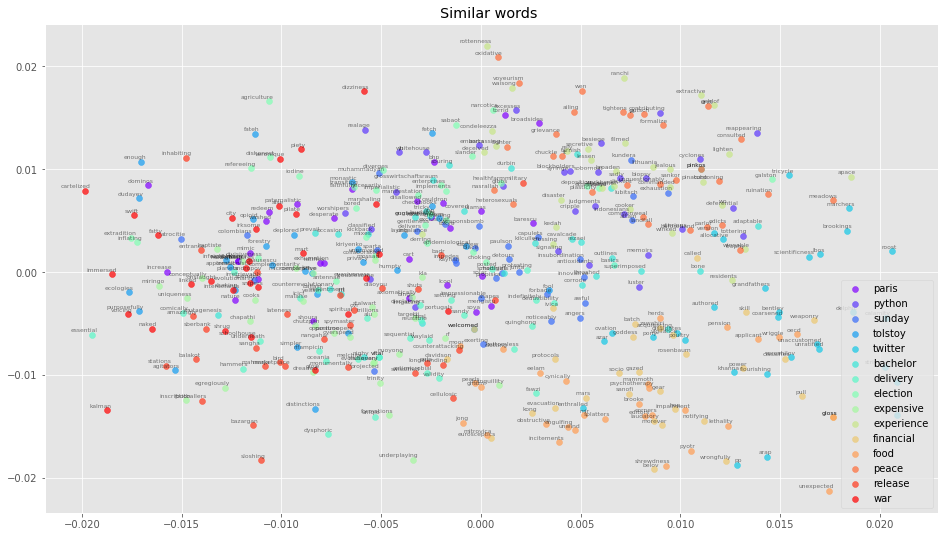

In [54]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def PCAplot(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=6)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


PCAplot('Similar words ', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

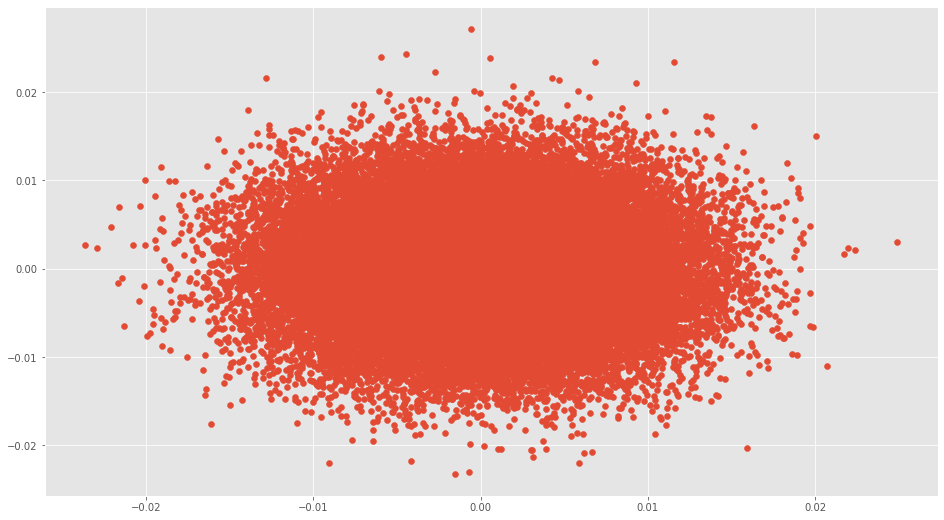

In [50]:
X = model.wv[model.wv.vocab]
plt.figure(figsize=(16,9))
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
plt.show()